# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [14]:
import pandas as pd 
import numpy as np

data = pd.read_csv('fuel_econ.csv')

numerical_data = data.select_dtypes(include=['float64', 'int64'])

#calculating the mean and standard deviation
mean = np.mean(numerical_data, axis=0) 
std_dev = np.std(numerical_data, axis=0)  

# Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation

standardized_data = (numerical_data - mean) / std_dev 
print(standardized_data)

#testing the code if they mean of a column is actually 0
test = np.mean(standardized_data['city'])
print(f' City Mean: {test:.10f}' )

            id      year  cylinders     displ       pv2       pv4      city  \
0    -1.737140 -1.475835   0.283102  0.650536  1.467096 -1.217378 -0.859960   
1    -1.736684 -1.475835  -0.781816 -0.727998  1.864762 -1.217378  0.006427   
2    -1.736227 -1.475835   0.283102  0.497365  1.864762 -1.217378 -0.694416   
3    -1.735770 -1.475835   0.283102  0.497365  1.864762 -1.217378 -0.782800   
4    -1.735313 -1.475835  -0.781816 -0.421657 -0.627278  0.734890  0.471083   
...        ...       ...        ...       ...       ...       ...       ...   
3924  1.770283  1.474784  -0.781816 -0.881169 -0.627278 -1.217378  5.346290   
3925  1.777592  1.474784  -0.781816 -0.727998 -0.627278  0.960942  2.749115   
3926  1.778049  1.474784  -0.781816 -0.727998 -0.627278  0.960942  2.909231   
3927  1.778506  1.474784   0.283102  0.344195  1.997318 -1.217378 -0.417976   
3928  1.778962  1.474784   0.283102  0.344195  1.997318 -1.217378 -0.606417   

         UCity   highway  UHighway      comb       

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [15]:
# Step 3: Calculate the Covariance Matrix
cov_matrix =  np.cov(standardized_data, rowvar=False)   # Calculate covariance matrix
print(cov_matrix)

[[ 1.00025458  0.98591866 -0.06011148 -0.07468488 -0.00657025 -0.02195656
   0.09182316  0.09124849  0.0906161   0.09538375  0.09382686 -0.09974229
  -0.1279056  -0.12235207]
 [ 0.98591866  1.00025458 -0.05532701 -0.07044161  0.00623397 -0.03365174
   0.06806739  0.06675938  0.07330836  0.07766039  0.07201181 -0.0811853
  -0.1498676  -0.14517775]
 [-0.06011148 -0.05532701  1.00025458  0.93411019  0.24763384 -0.00426546
  -0.69327904 -0.66619842 -0.76646982 -0.77169964 -0.73821112  0.84848979
  -0.78405759 -0.78201448]
 [-0.07468488 -0.07044161  0.93411019  1.00025458  0.2594021   0.02207729
  -0.71366074 -0.6863403  -0.78418374 -0.78865771 -0.75859024  0.85559254
  -0.7936343  -0.79141752]
 [-0.00657025  0.00623397  0.24763384  0.2594021   1.00025458 -0.66581137
  -0.27817962 -0.27261515 -0.29688365 -0.29858023 -0.29095711  0.28727323
  -0.2961638  -0.29323103]
 [-0.02195656 -0.03365174 -0.00426546  0.02207729 -0.66581137  1.00025458
   0.03519659  0.03787859  0.07497068  0.07746161  0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [16]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)


print(eigenvectors)

[8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]
[[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.69008152e-01
  -1.12579685e-02  5

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [17]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices of sorted eigenvalues

# Sort eigenvectors accordingly
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvectors

array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
         1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
         1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
        -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
        -7.10578367e-03,  6.07618642e-04],
       [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
        -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
         8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
         7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
        -3.26885432e-04, -3.98397374e-03],
       [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
         6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
         2.53817629e-01, -6.79764243e-01,  1.19688616e-01,
         2.20121563e-03,  1.99493288e-02,  1.60174402e-02,
         8.04028190e-03, -8.90395340e-04],
       [-2.86142593e-01,  3.10582044e-02,  6.39803619e-02,
         5.69008152e-01, -1.12579685e-02,  5.20085469e-04,
         2.41804525e-01,  7.26076226e-01,  5.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [18]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 2)


,0,1
0,-3.191462,1.987694
1,0.387527,1.991946
2,-2.091485,2.037434
3,-2.379141,2.063802
4,2.597268,2.504202


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

KeyError: (slice(None, None, None), 0)

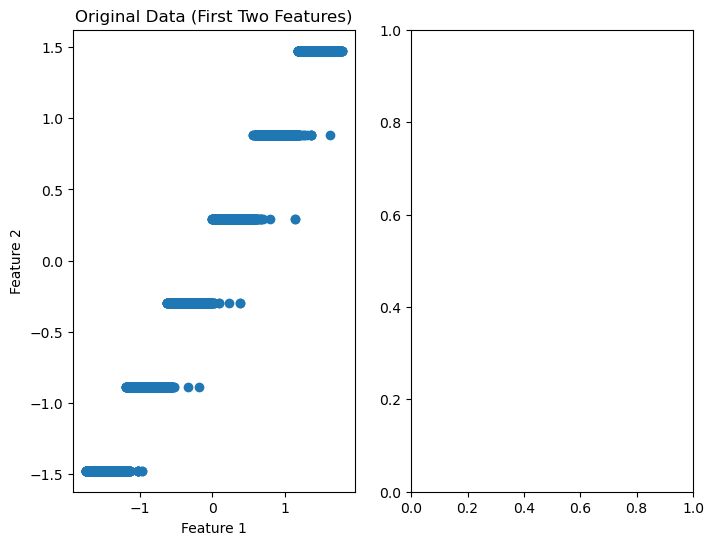

In [22]:
import matplotlib.pyplot as plt
# Plot original data (first two features for simplicity)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1])
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Plot reduced data after PCA

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()